In [4]:
import sys
#sys.path.insert(0,"/content/drive/MyDrive/Colab Notebooks")
#!pip install gymnasium

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F #INM707 Lab 8
import random
import jungle
from jungleenv import JungleEnv
import dqn
import matplotlib.pyplot as plt
from collections import namedtuple, deque
import torch.optim as optim

In [6]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("cuda")
else:
  device = torch.device("cpu") 
  print("cpu")

cpu


In [7]:
#Set Q Learning parameters
experiment_name = "exp1"
episodes = 100


parameters = [
    {"experiment_id":1, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.9, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":2, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.7, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":3, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.5, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":4, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0.3, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    ,{"experiment_id":5, "seed":45, "algorithm":"Double", "episodes":episodes, "epsilon": 0.9, "gamma":0, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}
    #{"experiment_id":5, "seed":45, "algorithm":"Classic", "episodes":episodes, "epsilon": 0.9, "gamma":0, "epsilon_decay":0.999, "learning_rate":1e-03, "buffer_size":1000, "batch_size":100, "target_update_interval":100, "loss_type":dqn.LossFunction.MSE,"device":device,"duelling":False, "sizeof_hidden":256,"number_of_hidden": 4,"number_of_common": 2,"number_of_value": 2,"number_of_advantage": 2,"display":["gamma"]}

]
                         

In [8]:
env = JungleEnv(7)
kwargs = {}

results = []
for kwargs in parameters:
    if kwargs["algorithm"] == "Classic":
      dqnagent = dqn.ClassicDQNAgent(env, **kwargs)
    else:
        dqnagent = dqn.DoubleDQNAgent(env,**kwargs)

    results += dqnagent.train(experiment_id = kwargs["experiment_id"],episodes=kwargs["episodes"], seed=kwargs["seed"])

# dqnagent = dqn.ClassicDQNAgent(env=env,buffer_size=1000,batch_size=100,
#                            learning_rate=1e-06,
#                            gamma=0.5,
#                            target_update_interval=100,
#                            epsilon=0.9,
#                            epsilon_decay=0.999,
#                            loss_type=dqn.LossFunction.MSE,
#                            duelling=False,
#                            device=device
#                            )

# results = dqnagent.train(episode_count=100)


# rewards = np.array([[res["episode"], res["episode_reward"],0] for res in results])
# steps_in_episode = np.array([[res["episode"], res["steps_taken"],0] for res in results])
# ending_topography = np.array([[res["episode"], res["topography"],0] for res in results])

# for i in range(len(results)):
#     rewards[i][2] = sum(rewards[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
#     steps_in_episode[i][2] = sum(steps_in_episode[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward

# plt.figure(1)
# plt.plot(rewards[:, [0]], rewards[:, [2]], label="Average cumulative Reward")
# plt.legend()
# plt.show()

# plt.figure(2)
# plt.plot(steps_in_episode[:, [0]], steps_in_episode[:, [2]], label="Average Steps Taken")
# plt.legend()
# plt.show()


Episode 0 Reward 4874 Epsilon 0.9 Steps Taken 53 Topography E
Episode 10 Reward 371 Epsilon 0.8910403921887733 Steps Taken 15 Topography S
Episode 20 Reward 856 Epsilon 0.8821699783465812 Steps Taken 22 Topography S
Episode 30 Reward 6172 Epsilon 0.8733878705367771 Steps Taken 160 Topography E
Episode 40 Reward 4976 Epsilon 0.8646931896622304 Steps Taken 25 Topography E
Episode 50 Reward 5666 Epsilon 0.8560850653773279 Steps Taken 153 Topography E
Episode 60 Reward -114 Epsilon 0.8475626360008509 Steps Taken 7 Topography S
Episode 70 Reward -613 Epsilon 0.8391250484297209 Steps Taken 200 Topography S
Episode 80 Reward -111 Epsilon 0.8307714580536021 Steps Taken 4 Topography S
Episode 90 Reward -107 Epsilon 0.8225010286703565 Steps Taken 4 Topography S
Learning complete
Episode 0 Reward 5645 Epsilon 0.9 Steps Taken 153 Topography E
Episode 10 Reward 833 Epsilon 0.8910403921887733 Steps Taken 37 Topography S
Episode 20 Reward 6461 Epsilon 0.8821699783465812 Steps Taken 31 Topography E
Ep

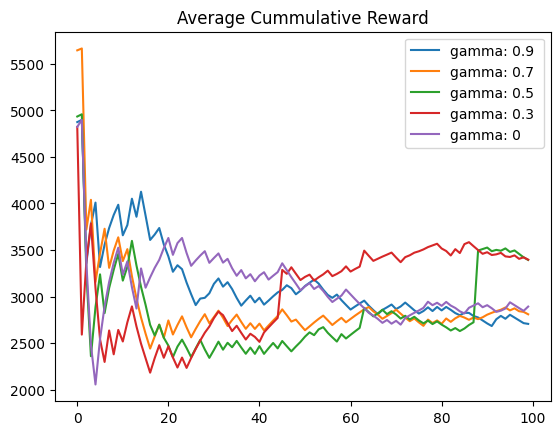

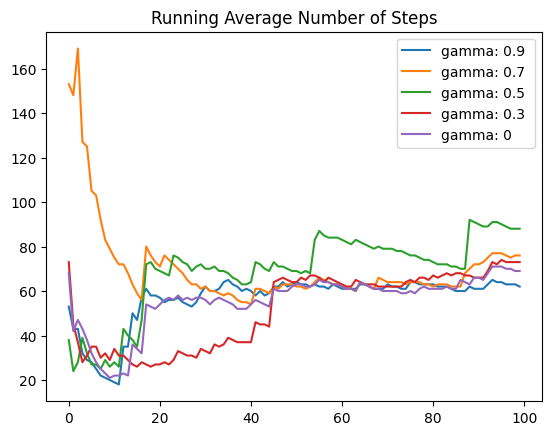

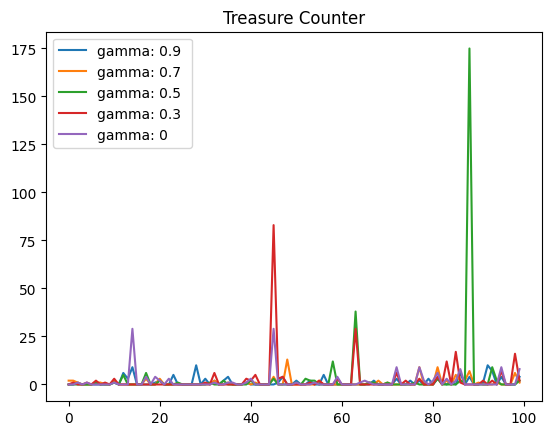

In [9]:
for params in parameters:
    # Get the experiment id
    id = params["experiment_id"]
    display_params = params["display"]
    # Get all the results for this experiment
    exp_res = [res for res in results if res["experiment_id"] == id]

    
    
    # Build the label
    display_label = ""
    for item in display_params:
        display_label += item + ": " + str(params[item]) + " "


    # For the experiment, get the metrics to display
    rewards = np.array([[res["episode"], res["episode_reward"], 0] for res in exp_res])
    steps_in_episode = np.array([[res["episode"], res["steps_taken"], 0] for res in exp_res])
    ending_topography = np.array([[res["episode"], res["topography"], 0] for res in exp_res])
    treasure_counter = np.array([[res["episode"], res["treasure_counter"], 0] for res in exp_res])


    for i in range(len(rewards)):
        rewards[i][2] = sum(rewards[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
        steps_in_episode[i][2] = sum(steps_in_episode[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
        #treasure_counter[i][2] = sum(treasure_counter[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
   
    plt.figure(1)
    plt.plot(rewards[:, [0]], rewards[:, [2]], label=display_label)
    plt.title("Average Cummulative Reward")
    plt.figure(2)
    plt.plot(steps_in_episode[:, [0]], steps_in_episode[:, [2]], label=display_label)
    plt.title("Running Average Number of Steps")
    plt.figure(3)
    plt.plot(treasure_counter[:, [0]], treasure_counter[:, [1]], label=display_label)
    plt.title("Treasure Counter")


plt.figure(1)
plt.legend()

plt.figure(2)
plt.legend()

plt.figure(3)
plt.legend()


plt.show()


In [10]:
print(results)

[{'experiment_id': 1, 'parameters': {'experiment_id': 1, 'seed': 45, 'algorithm': 'Double', 'episodes': 100, 'epsilon': 0.9, 'gamma': 0.9, 'epsilon_decay': 0.999, 'learning_rate': 0.001, 'buffer_size': 1000, 'batch_size': 100, 'target_update_interval': 100, 'loss_type': 'MSE', 'device': device(type='cpu'), 'duelling': False, 'sizeof_hidden': 256, 'number_of_hidden': 4, 'number_of_common': 2, 'number_of_value': 2, 'number_of_advantage': 2, 'display': ['gamma']}, 'episode': 0, 'episode_reward': 4874, 'treasure_counter': 0, 'steps_taken': 53, 'topography': 'E'}, {'experiment_id': 1, 'parameters': {'experiment_id': 1, 'seed': 45, 'algorithm': 'Double', 'episodes': 100, 'epsilon': 0.9, 'gamma': 0.9, 'epsilon_decay': 0.999, 'learning_rate': 0.001, 'buffer_size': 1000, 'batch_size': 100, 'target_update_interval': 100, 'loss_type': 'MSE', 'device': device(type='cpu'), 'duelling': False, 'sizeof_hidden': 256, 'number_of_hidden': 4, 'number_of_common': 2, 'number_of_value': 2, 'number_of_advanta

In [11]:
for params in parameters:
    # Get the experiment id
    id = params["experiment_id"]
    display_params = params["display"]
    # Get all the results for this experiment
    exp_res = [res for res in results if res["experiment_id"] == id]

    
    
    # Build the label
    display_label = ""
    for item in display_params:
        display_label += item + ": " + str(params[item]) + " "


    # For the experiment, get the metrics to display
    rewards = np.array([[res["episode"], res["episode_reward"], 0] for res in exp_res])
    steps_in_episode = np.array([[res["episode"], res["steps_taken"], 0] for res in exp_res])
    ending_topography = np.array([[res["episode"], res["topography"], 0] for res in exp_res])
    treasure_counter = np.array([[res["episode"], res["treasure_counter"], 0] for res in exp_res])


    for i in range(len(rewards)):
        rewards[i][2] = sum(rewards[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
        steps_in_episode[i][2] = sum(steps_in_episode[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
        #treasure_counter[i][2] = sum(treasure_counter[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
    print(id, rewards)
   

1 [[   0 4874 4874]
 [   1 4922 4898]
 [   2  278 3358]
 [   3 5000 3768]
 [   4 4974 4009]
 [   5 -144 3317]
 [   6 4995 3557]
 [   7 4998 3737]
 [   8 4990 3876]
 [   9 4980 3986]
 [  10  371 3658]
 [  11 4978 3768]
 [  12 7452 4051]
 [  13 1336 3857]
 [  14 7900 4126]
 [  15    0 3869]
 [  16 -557 3608]
 [  17 4656 3666]
 [  18 4992 3736]
 [  19  206 3560]
 [  20  856 3431]
 [  21 -184 3266]
 [  22 4860 3336]
 [  23 2342 3294]
 [  24 -309 3150]
 [  25 -110 3025]
 [  26 -134 2908]
 [  27 4884 2978]
 [  28 3208 2986]
 [  29 4448 3035]
 [  30 6172 3136]
 [  31 4993 3194]
 [  32  275 3106]
 [  33 4765 3154]
 [  34  563 3080]
 [  35 -348 2985]
 [  36 -100 2902]
 [  37 4984 2957]
 [  38 4999 3009]
 [  39  129 2937]
 [  40 4976 2987]
 [  41 -102 2913]
 [  42 4768 2956]
 [  43 4995 3002]
 [  44 4850 3044]
 [  45 4312 3071]
 [  46 5436 3121]
 [  47 1595 3090]
 [  48 -102 3024]
 [  49 4878 3062]
 [  50 5666 3113]
 [  51 4961 3148]
 [  52 4939 3182]
 [  53  862 3139]
 [  54 -416 3074]
 [  55 -